#**Import libriaries**

In [3]:
import pandas as pd
import numpy as np
import re
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as ImbPipeline
import joblib
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
nltk.download('stopwords')
# Initialize NLP tools
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


#**Upload the Dataset**

In [60]:

# Upload the CSV file
from google.colab import files
uploaded = files.upload()


Saving Quantum_Data.csv to Quantum_Data.csv


In [61]:
df = pd.read_csv('/content/Quantum_Data.csv')

# Check the distribution of sentiment classes
print("Sentiment Distribution:")
print(df['Sentiment'].value_counts())

Sentiment Distribution:
Sentiment
Positive    735
Neutral     339
Negative    165
Name: count, dtype: int64


In [62]:
df.head()

,Text,Sentiment
0,"Let's talk about Google's Willow chip, a quant...",Positive
1,"Willow didn't just break records, it shattered...",Neutral
2,It solved a problem in under five minutes. Tha...,Neutral
3,And here's the twist.,Neutral
4,Some scientists think this quantum magic might...,Positive


#**Clean and summerize the Text**

In [63]:
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    #Convert all sentiments to lower case
    Sentiment = text.lower()

    # Remove URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)

    # Remove user @ references and '#' from hashtags
    text = re.sub(r'\@\w+|\#', '', text)

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove numbers
    text = re.sub(r'\d+', '', text)

    # Tokenize text
    tokens = word_tokenize(text)

    # Remove stopwords and lemmatize
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    # Join tokens back to string
    clean_text = ' '.join(tokens)

    return clean_text

In [64]:
import nltk
nltk.download('punkt_tab')
nltk.download('wordnet')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [66]:
from textblob import TextBlob
#Use textblob to summerize the text
# Apply cleaning to your text column
df['cleaned_text'] = df['Text'].apply(clean_text)
def summarize_text(clean_text):
    blob = TextBlob(clean_text)
    sentences = blob.sentences
    if len(sentences) > 1:
        return str(sentences[0]) + ' ' + str(sentences[-1])
    return clean_text
# Assign the summarized  text to an another colomn
df['summarized_text'] = df['cleaned_text'].apply(summarize_text)

# Display cleaned text
print("Original text:", df['Text'].iloc[0:10])
print("Cleaned text:", df['summarized_text'].iloc[0:10])

Original text: 0    Let's talk about Google's Willow chip, a quant...
1    Willow didn't just break records, it shattered...
2    It solved a problem in under five minutes. Tha...
3                                And here's the twist.
4    Some scientists think this quantum magic might...
5    In this video, we'll break it all down. What W...
6    Google's Willow Chip is a 105-qubit quantum pr...
7    Classical computers use bits, zeros, and ones ...
8    Quantum computers, on the other hand, use qubi...
9    Superposition means qubits can exist as both z...
Name: Text, dtype: object
Cleaned text: 0    let talk google willow chip quantum computer p...
1                  willow didnt break record shattered
2    solved problem five minute would take fastest ...
3                                           here twist
4    scientist think quantum magic might involve pa...
5    video well break willow achieved multiverse su...
6    google willow chip qubit quantum processor you...
7    class

In [67]:
df.head()

,Text,Sentiment,cleaned_text,summarized_text
0,"Let's talk about Google's Willow chip, a quant...",Positive,let talk google willow chip quantum computer p...,let talk google willow chip quantum computer p...
1,"Willow didn't just break records, it shattered...",Neutral,willow didnt break record shattered,willow didnt break record shattered
2,It solved a problem in under five minutes. Tha...,Neutral,solved problem five minute would take fastest ...,solved problem five minute would take fastest ...
3,And here's the twist.,Neutral,here twist,here twist
4,Some scientists think this quantum magic might...,Positive,scientist think quantum magic might involve pa...,scientist think quantum magic might involve pa...


In [30]:
df['Sentiment'] = df['Sentiment'].str.lower()
print(df['Sentiment'].value_counts())

Sentiment
positive    2812
neutral      872
negative     752
Name: count, dtype: int64


In [68]:
# Check class distribution
# Display the data cout according to the sentiment before balancing

class_dist = df['Sentiment'].value_counts()
print("Before balancing:")
print(class_dist)



# Separate features and target
X = df['summarized_text']
y = df['Sentiment']

# Split into train and test sets first
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Vectorize text data
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Balance the training data
# Option 1: SMOTE (oversampling)
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_vec, y_train)


# Data Cout after balancing
print("\nAfter balancing:")
print(pd.Series(y_train_balanced).value_counts())

Before balancing:
Sentiment
Positive    735
Neutral     339
Negative    165
Name: count, dtype: int64

After balancing:
Sentiment
Positive    515
Negative    515
Neutral     515
Name: count, dtype: int64


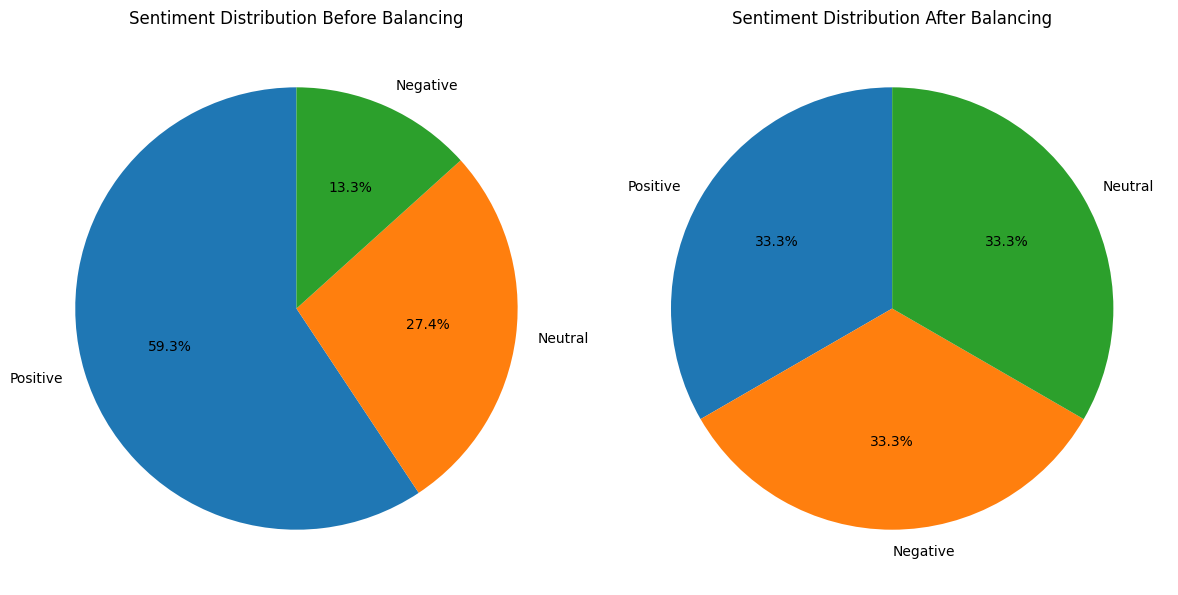

In [69]:
# Data for the pie chart
before_balancing = df['Sentiment'].value_counts()
after_balancing = pd.Series(y_train_balanced).value_counts()

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Pie chart for before balancing
axes[0].pie(before_balancing, labels=before_balancing.index, autopct='%1.1f%%', startangle=90)
axes[0].set_title('Sentiment Distribution Before Balancing')

# Pie chart for after balancing
axes[1].pie(after_balancing, labels=after_balancing.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Sentiment Distribution After Balancing')

# Display the plots
plt.tight_layout()
plt.show()



Training Random Forest...
Random Forest Accuracy: 0.7554
Classification Report:
              precision    recall  f1-score   support

    Negative       0.55      0.14      0.23        42
     Neutral       0.65      0.85      0.74       110
    Positive       0.83      0.83      0.83       220

    accuracy                           0.76       372
   macro avg       0.68      0.61      0.60       372
weighted avg       0.75      0.76      0.73       372



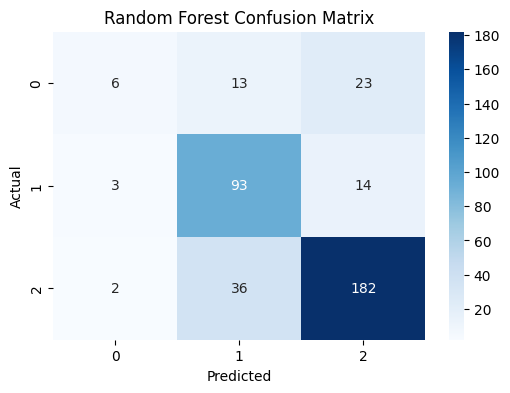


Training Naive Bayes...
Naive Bayes Accuracy: 0.6371
Classification Report:
              precision    recall  f1-score   support

    Negative       0.21      0.48      0.29        42
     Neutral       0.85      0.32      0.46       110
    Positive       0.77      0.83      0.80       220

    accuracy                           0.64       372
   macro avg       0.61      0.54      0.52       372
weighted avg       0.73      0.64      0.64       372



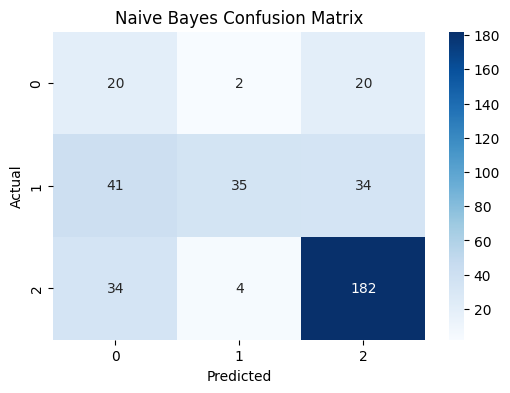


Training SVC...
SVC Accuracy: 0.6962
Classification Report:
              precision    recall  f1-score   support

    Negative       0.33      0.29      0.31        42
     Neutral       0.61      0.68      0.65       110
    Positive       0.80      0.78      0.79       220

    accuracy                           0.70       372
   macro avg       0.58      0.58      0.58       372
weighted avg       0.69      0.70      0.69       372



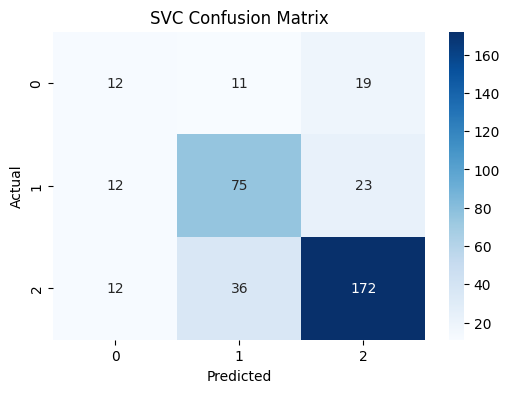


Training Logistic Regression...
Logistic Regression Accuracy: 0.7258
Classification Report:
              precision    recall  f1-score   support

    Negative       0.34      0.38      0.36        42
     Neutral       0.70      0.67      0.69       110
    Positive       0.82      0.82      0.82       220

    accuracy                           0.73       372
   macro avg       0.62      0.62      0.62       372
weighted avg       0.73      0.73      0.73       372



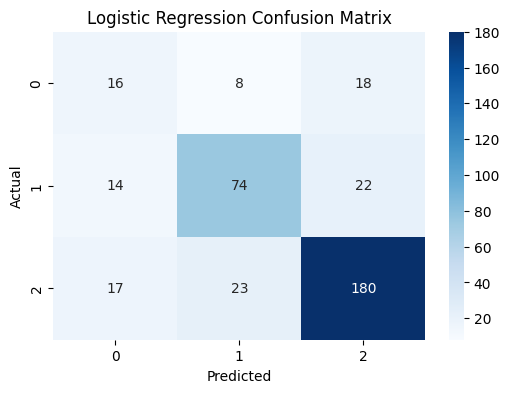

In [75]:
# Define models to train
models = {
    'Random Forest': RandomForestClassifier(n_estimators=200, random_state=92),
    'Naive Bayes': MultinomialNB(),
    'SVC': SVC(kernel='linear', probability=True, random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42)
}

# Dictionary to store model performance and the models themselves
results = {}
trained_models = {}

for name, model in models.items():
    print(f"\nTraining {name}...")

    # Train the model
    model.fit(X_train_balanced, y_train_balanced)

    # Make predictions
    y_pred = model.predict(X_test_vec)

    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)

    # Store results
    results[name] = {
        'accuracy': accuracy,
        'report': report,
        'confusion_matrix': cm
    }

    # Store the trained model
    trained_models[name] = model

    # Print results
    print(f"{name} Accuracy: {accuracy:.4f}")
    print("Classification Report:")
    print(report)

    # Plot confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{name} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [76]:
# Create a directory(folder) to save models
import os
os.makedirs('saved_models', exist_ok=True)

# Save the vectorizer
joblib.dump(vectorizer, 'saved_models/tfidf_vectorizer.pkl')

# Save each trained model
for name, model in trained_models.items():
    filename = f'saved_models/{name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(model, filename)
    print(f"Saved {name} to {filename}")

Saved Random Forest to saved_models/random_forest_model.pkl
Saved Naive Bayes to saved_models/naive_bayes_model.pkl
Saved SVC to saved_models/svc_model.pkl
Saved Logistic Regression to saved_models/logistic_regression_model.pkl


In [77]:
# Compare model performances
print("\nModel Comparison:")
for name, result in results.items():
    print(f"{name}: Accuracy = {result['accuracy']:.4f}")

# Select the best model based on accuracy
best_model_name = max(results, key=lambda x: results[x]['accuracy'])
best_model = trained_models[best_model_name]
print(f"\nBest Model: {best_model_name} with accuracy {results[best_model_name]['accuracy']:.4f}")


Model Comparison:
Random Forest: Accuracy = 0.7554
Naive Bayes: Accuracy = 0.6371
SVC: Accuracy = 0.6962
Logistic Regression: Accuracy = 0.7258

Best Model: Random Forest with accuracy 0.7554


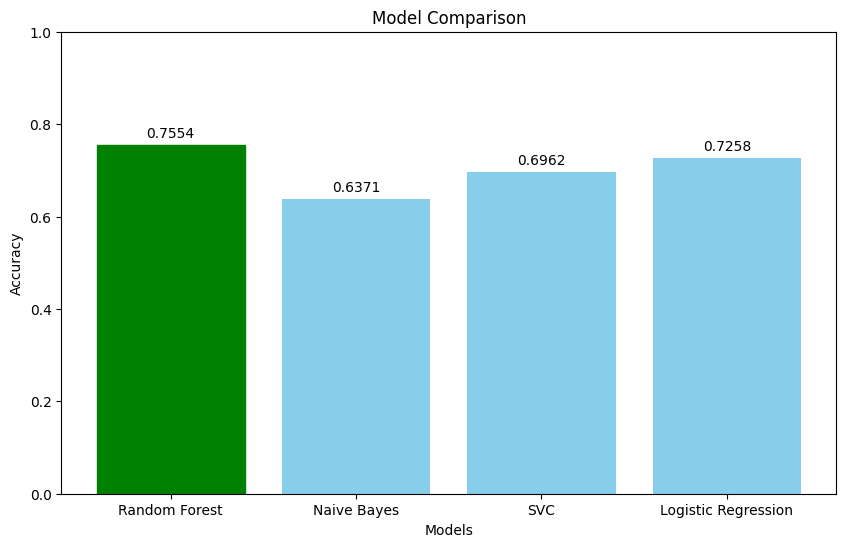

In [78]:
import matplotlib.pyplot as plt

# Assuming 'results' dictionary is available from the previous code
model_names = list(results.keys())
accuracies = [results[model]['accuracy'] for model in model_names]

plt.figure(figsize=(10, 6))
bars = plt.bar(model_names, accuracies, color='skyblue')

# Highlight the best model
best_model_index = accuracies.index(max(accuracies))
bars[best_model_index].set_color('green')

plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.title("Model Comparison")
plt.ylim(0, 1)  # Set y-axis limit to 0-1 for accuracy

# Add accuracy values on top of each bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f"{accuracy:.4f}", ha='center', va='bottom')


plt.show()


In [79]:
# prompt: predicd some text and using random forest

# Load the best model and vectorizer
import joblib
import pandas as pd

# Load the vectorizer
vectorizer = joblib.load('saved_models/tfidf_vectorizer.pkl')

# Load the best model (replace with your best model's filename)
best_model = joblib.load('saved_models/random_forest_model.pkl')

def predict_sentiment(text):
    # Check if text is a list and process each item separately
    if isinstance(text, list):
        return [predict_sentiment(item) for item in text]  # Recursively call for each item

    # Clean the input text
    cleaned_text = clean_text(text) # Assuming clean_text function from previous code
    summarized_text = summarize_text(cleaned_text) # Assuming summarize_text function

    # Vectorize the input text using the loaded vectorizer
    text_vec = vectorizer.transform([summarized_text])

    # Predict the sentiment using the loaded model
    prediction = best_model.predict(text_vec)[0]

    return prediction

# Example usage
new_text = ["quantum computing is good","scientist think quantum magic might involve.","Quatum ai is danger"]
predicted_sentiment = predict_sentiment(new_text)
print(f"Predicted Sentiment for {new_text[0]}")
print(f"{predicted_sentiment[0]}")
print(f"Predicted Sentiment for {new_text[1]}")
print(f"{predicted_sentiment[1]}")
print(f"Predicted Sentiment for {new_text[2]}")
print(f"{predicted_sentiment[2]}")

Predicted Sentiment for quantum computing is good
Positive
Predicted Sentiment for scientist think quantum magic might involve.
Neutral
Predicted Sentiment for Quatum ai is danger
Negative
